In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import json


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
/kaggle/input/arc-prize-2024/sample_submission.json
/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json


In [2]:
def load_json_file(path):
    with open(path) as file:
        return json.load(file)

eval_challenges = load_json_file("/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json")
eval_solutions = load_json_file("/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json")
test_challenges = load_json_file("/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json")
train_challenges = load_json_file("/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json")
train_solutions = load_json_file("/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json")

In [3]:
cmap = colors.ListedColormap(['black', 'blue', 'red', 'green', 'yellow', 'gray', 'magenta', 'orange', 'cyan', 'brown'])
norm = colors.Normalize(vmin=0, vmax=9)

def plot_task(task, task_solution=None):
    n_train_pairs = len(task['train'])
    n_test_pairs = len(task['test'])
    
    fig, axs = plt.subplots(n_train_pairs + n_test_pairs, 2, figsize=(5, 5 * (n_train_pairs + n_test_pairs)))
    fig.suptitle('Task')
    
    for i in range(n_train_pairs):
        axs[i, 0].imshow(task['train'][i]['input'], cmap=cmap, norm=norm)
        axs[i, 0].set_title('Train Input')
        axs[i, 0].axis('off')
        
        axs[i, 1].imshow(task['train'][i]['output'], cmap=cmap, norm=norm)
        axs[i, 1].set_title('Train Output')
        axs[i, 1].axis('off')
            
    for i in range(n_test_pairs):
        axs[n_train_pairs + i, 0].imshow(task['test'][i]['input'], cmap=cmap, norm=norm)
        axs[n_train_pairs + i, 0].set_title('Test Input')
        axs[n_train_pairs + i, 0].axis('off')
        
        if 'output' in task['test'][i]:
            axs[n_train_pairs + i, 1].imshow(task['test'][i]['output'], cmap=cmap, norm=norm)
            axs[n_train_pairs + i, 1].set_title('Test Output (Ground Truth)')
        elif task_solution:
            axs[n_train_pairs + i, 1].imshow(task_solution, cmap=cmap, norm=norm)
            axs[n_train_pairs + i, 1].set_title('Test Output (Predicted)')
            
        axs[n_train_pairs + i, 1].axis('off')
        
    plt.show()

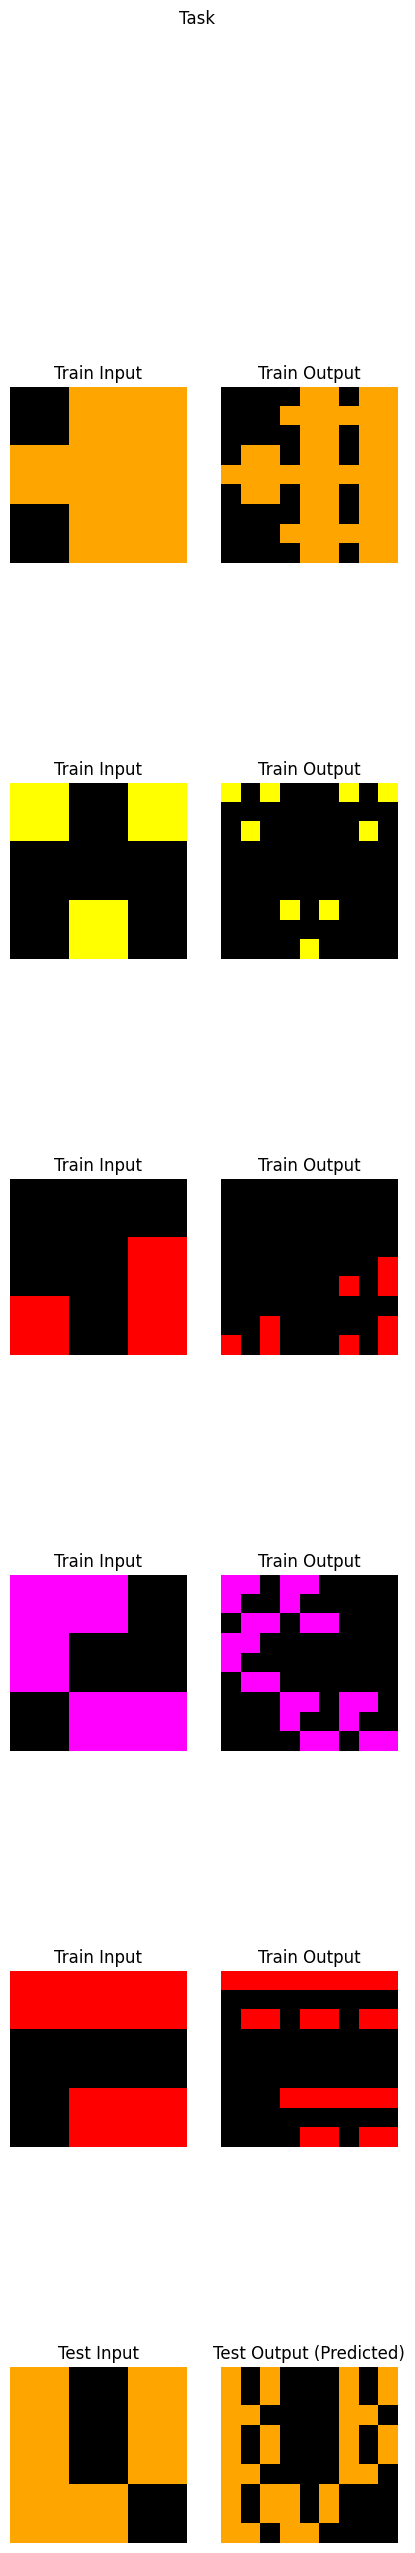

In [4]:
example_task = train_challenges['007bbfb7']
example_solution = train_solutions['007bbfb7'][0]
plot_task(example_task, example_solution)